In [1]:
import numpy as np
from scipy.stats import beta, binom

import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme
sns.set_theme(style="darkgrid")

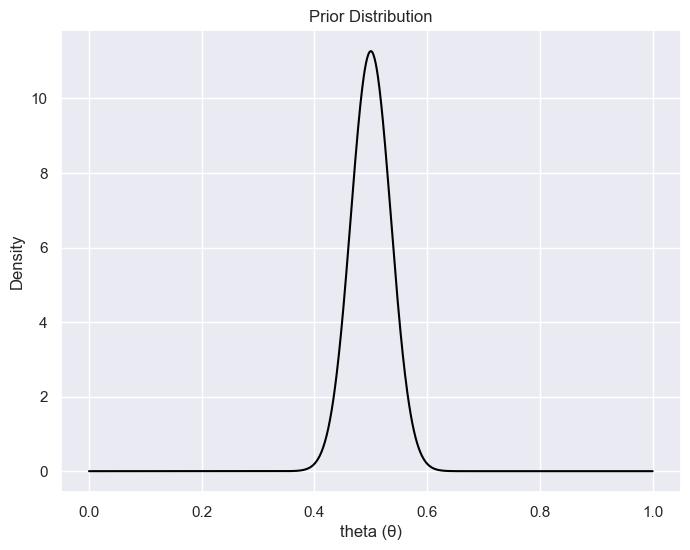

In [2]:
# Parameters
aprior = 100
bprior = 100
theta = np.linspace(0, 1, 1000)

# Prior distribution
prior_dist = beta.pdf(theta, aprior, bprior)

# Plot prior distribution
plt.figure(figsize=(8, 6))
plt.plot(theta, prior_dist, color='black', label="Prior Distribution")
plt.xticks(np.arange(0, 1.1, 0.2))
plt.title("Prior Distribution")
plt.xlabel("theta (θ)")
plt.ylabel("Density")
plt.show()

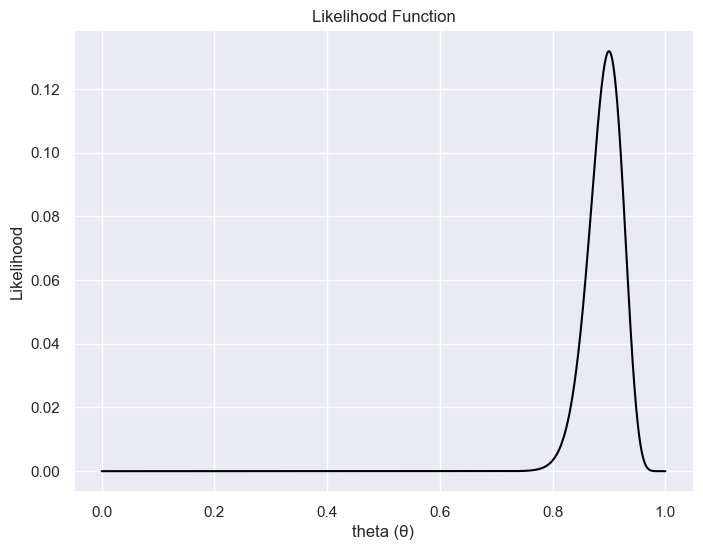

In [3]:
# Coin flip results
x = 90
n = 100

# Likelihood function
ll_li = binom.pmf(x, n, theta)

# Plot likelihood function
plt.figure(figsize=(8, 6))
plt.plot(theta, ll_li, color='black', label="Likelihood Function")
plt.xticks(np.arange(0, 1.1, 0.2))
plt.title("Likelihood Function")
plt.xlabel("theta (θ)")
plt.ylabel("Likelihood")
plt.show()

In [4]:
# Posterior distribution
aposterior = aprior + x
bposterior = bprior + n - x
posterior_dist = beta.pdf(theta, aposterior, bposterior)

# Posterior mean
m_prior = aprior / (aprior + bprior)
m_posterior = aposterior / (aposterior + bposterior)

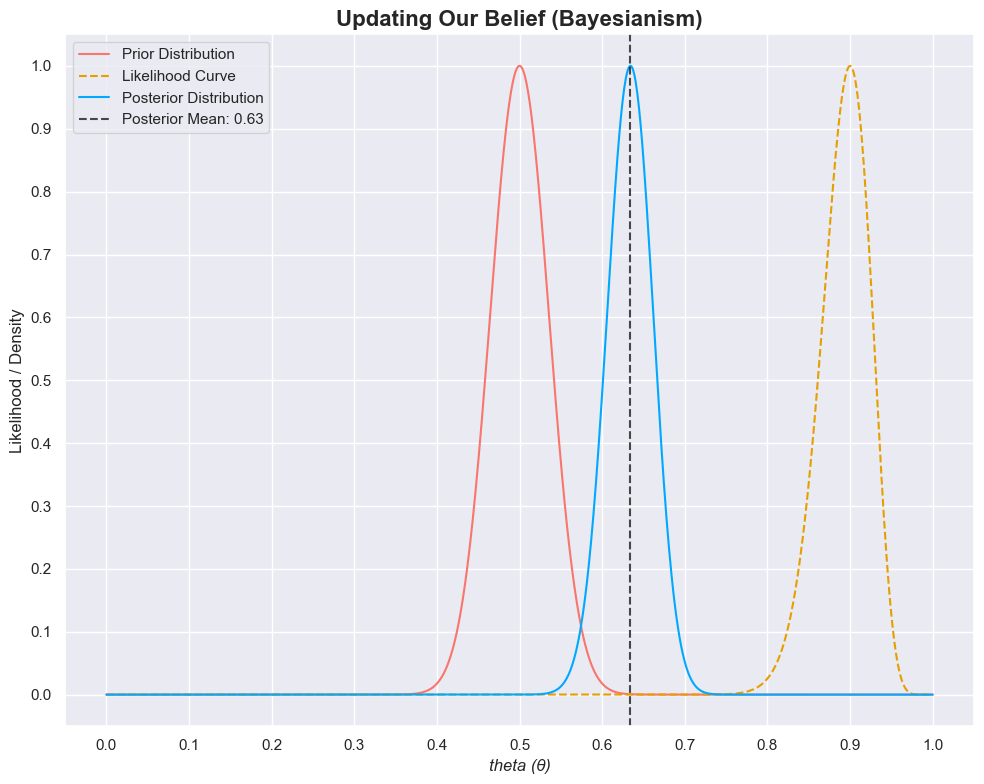

In [6]:
# Colors and titles
color_pal = {'0': '#F8766D', '1': '#00A9FF', '2': '#E69F00'}
title_text = (
    f"<Prior Distribution (red)> - "
    f"<Likelihood (yellow)> - "
    f"<Posterior Distribution (blue)>"
)

# Combined plot
plt.figure(figsize=(10, 8))
plt.plot(theta, prior_dist / max(prior_dist), color=color_pal['0'], linewidth=1.5, label="Prior Distribution")
plt.plot(theta, ll_li / max(ll_li), linestyle='dashed', color=color_pal['2'], linewidth=1.5, label="Likelihood Curve")
plt.plot(theta, posterior_dist / max(posterior_dist), color=color_pal['1'], linewidth=1.5, label="Posterior Distribution")
plt.axvline(x=m_posterior, linestyle='dashed', alpha=0.7, color='black', label=f"Posterior Mean: {m_posterior:.2f}")

# Aesthetic adjustments
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Updating Our Belief (Bayesianism)", fontsize=16, weight='bold')
plt.xlabel("theta (θ)", fontsize=12, style='italic')
plt.ylabel("Likelihood / Density", fontsize=12)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()